# 📊 Confidence Interval Comparison: Gaussian vs Beta

**ผู้เขียน**: Hamdee Naseng  
**วันที่**: 3 พฤศจิกายน 2025  
**วัตถุประสงค์**: เปรียบเทียบ **Frequentist (Gaussian)** กับ **Bayesian (Beta)** ในการประมาณ CTR

---

## 🎯 โค้ดนี้เปรียบเทียบอะไร?

### 🆚 สองแนวทาง:

#### 1. **Frequentist Approach (Gaussian Approximation)**
- ใช้ **Central Limit Theorem** (CLT)
- Confidence Interval: p̂ ± z × SE
- ต้องมีข้อมูลเยอะพอ (n ≥ 30)
- **ไม่ใช่ probability distribution** แต่เป็น interval estimate

#### 2. **Bayesian Approach (Beta Posterior)**
- ใช้ **Beta-Bernoulli Conjugate**
- Posterior: Beta(a, b) อัพเดทตามข้อมูล
- ทำงานได้แม้ข้อมูลน้อย
- **คือ probability distribution** แสดงความไม่แน่ใจ

### 🔍 สิ่งที่จะเห็น:
- เมื่อข้อมูลน้อย → **Beta แม่นกว่า**
- เมื่อข้อมูลเยอะ → **ทั้งสองเหมือนกัน**
- Beta ให้ข้อมูลมากกว่า (full posterior distribution)

---

## 🪙 ตัวอย่าง: ทอยเหรียญ

**สถานการณ์**: 
- เหรียญมี CTR จริง = 50% (เหรียญที่เป็นธรรม)
- เราทอย 501 ครั้ง
- ดูว่าการประมาณเปลี่ยนไปอย่างไรที่ n = 10, 20, 30, 50, 100, 200, 500

---

## 📦 Step 1: Import และตั้งค่า

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, norm

# ตั้งค่า font สำหรับภาษาไทย
import matplotlib.font_manager as fm

font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
font_name = font_prop.get_name()

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

print("✅ Import สำเร็จ!")
print(f"✅ ตั้งค่า Font ภาษาไทยเป็น '{font_name}' เรียบร้อย")

✅ Import สำเร็จ!
✅ ตั้งค่า Font ภาษาไทยเป็น 'Prompt' เรียบร้อย


## ⚙️ Step 2: กำหนดพารามิเตอร์

กำหนดค่าต่าง ๆ สำหรับการทดลอง

In [3]:
# พารามิเตอร์การทดลอง
T = 501                    # จำนวนครั้งที่ทอยเหรียญ
true_ctr = 0.5             # CTR จริง (เหรียญเป็นธรรม)
a, b = 1, 1                # Beta prior: Beta(1,1) = Uniform

# จุดที่จะแสดงกราฟ
plot_indices = (10, 20, 30, 50, 100, 200, 500)

print("⚙️ พารามิเตอร์การทดลอง:")
print(f"\n   จำนวนครั้งทั้งหมด: {T}")
print(f"   CTR จริง: {true_ctr:.0%}")
print(f"   Beta Prior: Beta({a},{b})")
print(f"   จุดที่แสดงกราฟ: {plot_indices}")

print(f"\n💡 Beta(1,1) = Uniform distribution")
print(f"   → เราไม่รู้อะไรเลย เชื่อว่าทุกค่ามีโอกาสเท่ากัน")

⚙️ พารามิเตอร์การทดลอง:

   จำนวนครั้งทั้งหมด: 501
   CTR จริง: 50%
   Beta Prior: Beta(1,1)
   จุดที่แสดงกราฟ: (10, 20, 30, 50, 100, 200, 500)

💡 Beta(1,1) = Uniform distribution
   → เราไม่รู้อะไรเลย เชื่อว่าทุกค่ามีโอกาสเท่ากัน


## 🎲 Step 3: สร้างข้อมูลและอัพเดท Posterior

ทอยเหรียญ T ครั้ง และอัพเดท Beta posterior ทีละครั้ง

In [4]:
# เตรียมตัวแปร
data = np.empty(T)
a_updated, b_updated = a, b  # เก็บค่า a, b ที่อัพเดท

# ทอยเหรียญ T ครั้ง
print("🎲 ทอยเหรียญ 501 ครั้ง...\n")

for i in range(T):
    # สุ่มผลลัพธ์ (1 = หัว, 0 = ก้อย)
    x = 1 if np.random.random() < true_ctr else 0
    data[i] = x
    
    # อัพเดท Beta posterior
    a_updated += x           # ถ้าได้หัว → เพิ่ม a
    b_updated += (1 - x)     # ถ้าได้ก้อย → เพิ่ม b

print("✅ เสร็จสิ้นการทอยเหรียญ!")
print(f"\n📊 ผลลัพธ์:")
print(f"   หัว (1): {data.sum():.0f} ครั้ง")
print(f"   ก้อย (0): {(T - data.sum()):.0f} ครั้ง")
print(f"   CTR สังเกตได้: {data.mean():.1%}")
print(f"\n📈 Beta Posterior สุดท้าย: Beta({a_updated:.0f}, {b_updated:.0f})")

🎲 ทอยเหรียญ 501 ครั้ง...

✅ เสร็จสิ้นการทอยเหรียญ!

📊 ผลลัพธ์:
   หัว (1): 237 ครั้ง
   ก้อย (0): 264 ครั้ง
   CTR สังเกตได้: 47.3%

📈 Beta Posterior สุดท้าย: Beta(238, 265)


## 📊 Step 4: ฟังก์ชันสำหรับเปรียบเทียบ

สร้างฟังก์ชันที่วาดกราฟเปรียบเทียบ Gaussian vs Beta ในแต่ละจุดเวลา

In [5]:
def compare_distributions(data, n, a, b, true_ctr):
    """
    เปรียบเทียบ Gaussian Approximation กับ Beta Posterior
    
    Parameters:
    -----------
    data : array
        ข้อมูลทั้งหมด
    n : int
        จำนวนตัวอย่างที่ใช้
    a, b : float
        พารามิเตอร์ของ Beta posterior
    true_ctr : float
        CTR จริง
    """
    # 1. Frequentist: Gaussian Approximation
    p_hat = data[:n].mean()              # MLE estimate
    std = np.sqrt(p_hat * (1 - p_hat) / n)  # Standard Error
    
    # สร้างพื้นที่สำหรับวาดกราฟ
    x = np.linspace(0, 1, 200)
    
    # PDF ของ Gaussian
    gaussian = norm.pdf(x, loc=p_hat, scale=std)
    
    # 2. Bayesian: Beta Posterior
    posterior = beta.pdf(x, a=a, b=b)
    
    # วาดกราฟ
    plt.figure(figsize=(12, 6))
    
    plt.plot(x, gaussian, 'b-', linewidth=2, label='Frequentist (Gaussian)')
    plt.plot(x, posterior, 'r-', linewidth=2, label='Bayesian (Beta Posterior)')
    plt.axvline(true_ctr, color='green', linestyle='--', linewidth=2, label=f'True CTR = {true_ctr:.0%}')
    plt.axvline(p_hat, color='blue', linestyle=':', alpha=0.5, label=f'MLE = {p_hat:.2%}')
    
    plt.xlabel('CTR', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Gaussian vs Beta Posterior | n = {n}', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    plt.xlim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
    # แสดงสถิติ
    print(f"\n📊 n = {n}:")
    print(f"   Frequentist (Gaussian):")
    print(f"     - p̂ (MLE) = {p_hat:.4f}")
    print(f"     - SE = {std:.4f}")
    print(f"     - 95% CI = [{p_hat - 1.96*std:.4f}, {p_hat + 1.96*std:.4f}]")
    
    beta_mean = a / (a + b)
    beta_std = np.sqrt(a * b / ((a + b)**2 * (a + b + 1)))
    print(f"\n   Bayesian (Beta):")
    print(f"     - Mean = {beta_mean:.4f}")
    print(f"     - Std = {beta_std:.4f}")
    print(f"     - Beta({a:.0f}, {b:.0f})")
    
    print("\n   " + "="*50 + "\n")

print("✅ สร้างฟังก์ชัน compare_distributions เรียบร้อย!")

✅ สร้างฟังก์ชัน compare_distributions เรียบร้อย!


## 🔍 Step 5: เปรียบเทียบในจุดเวลาต่าง ๆ

มาดูกราฟเปรียบเทียบในแต่ละจุดเวลา

🔍 เริ่มการเปรียบเทียบ...



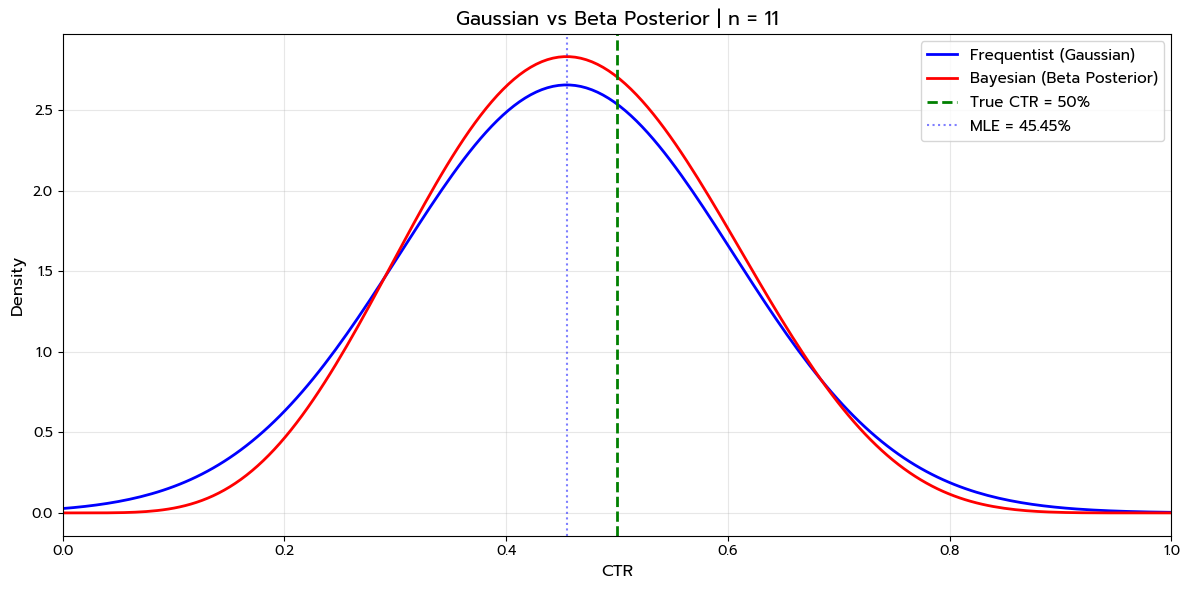


📊 n = 11:
   Frequentist (Gaussian):
     - p̂ (MLE) = 0.4545
     - SE = 0.1501
     - 95% CI = [0.1603, 0.7488]

   Bayesian (Beta):
     - Mean = 0.4615
     - Std = 0.1332
     - Beta(6, 7)




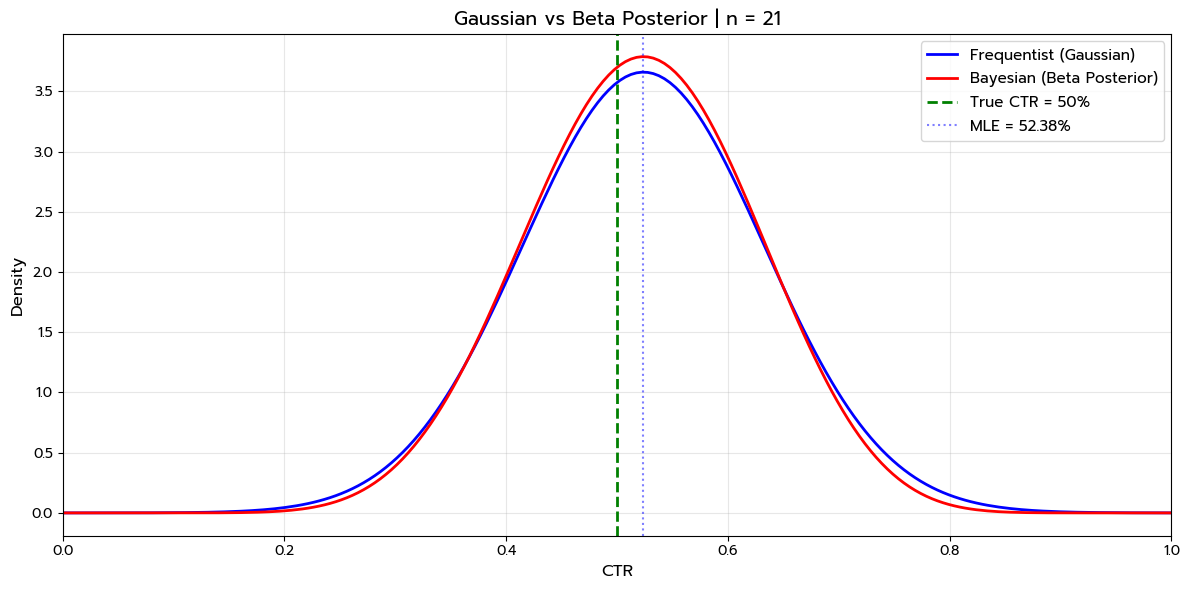


📊 n = 21:
   Frequentist (Gaussian):
     - p̂ (MLE) = 0.5238
     - SE = 0.1090
     - 95% CI = [0.3102, 0.7374]

   Bayesian (Beta):
     - Mean = 0.5217
     - Std = 0.1020
     - Beta(12, 11)




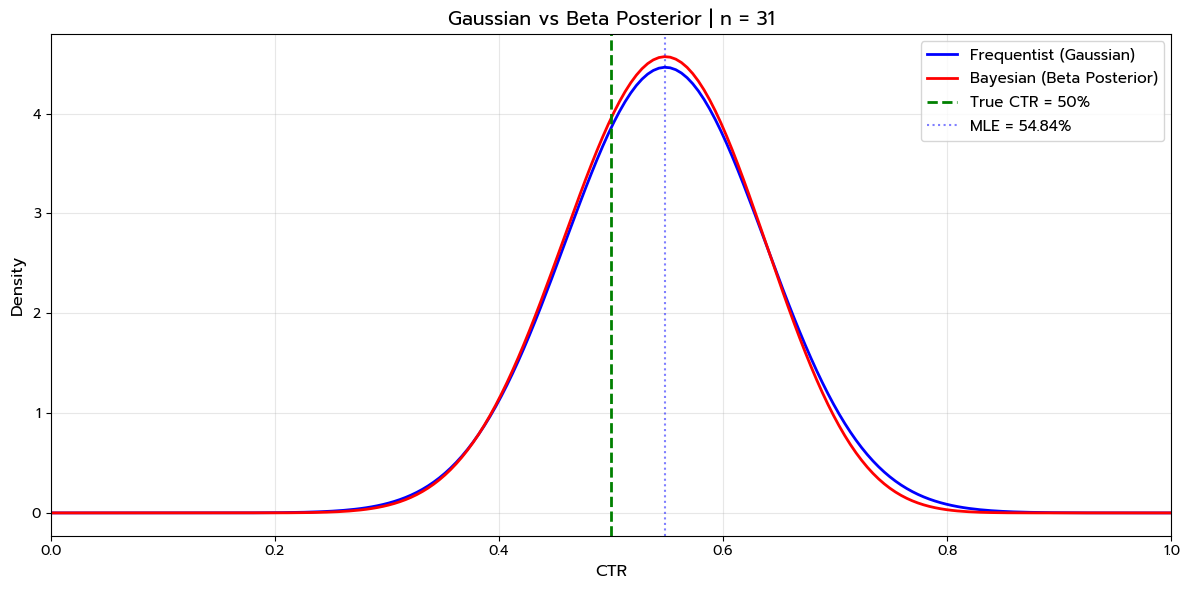


📊 n = 31:
   Frequentist (Gaussian):
     - p̂ (MLE) = 0.5484
     - SE = 0.0894
     - 95% CI = [0.3732, 0.7236]

   Bayesian (Beta):
     - Mean = 0.5455
     - Std = 0.0854
     - Beta(18, 15)




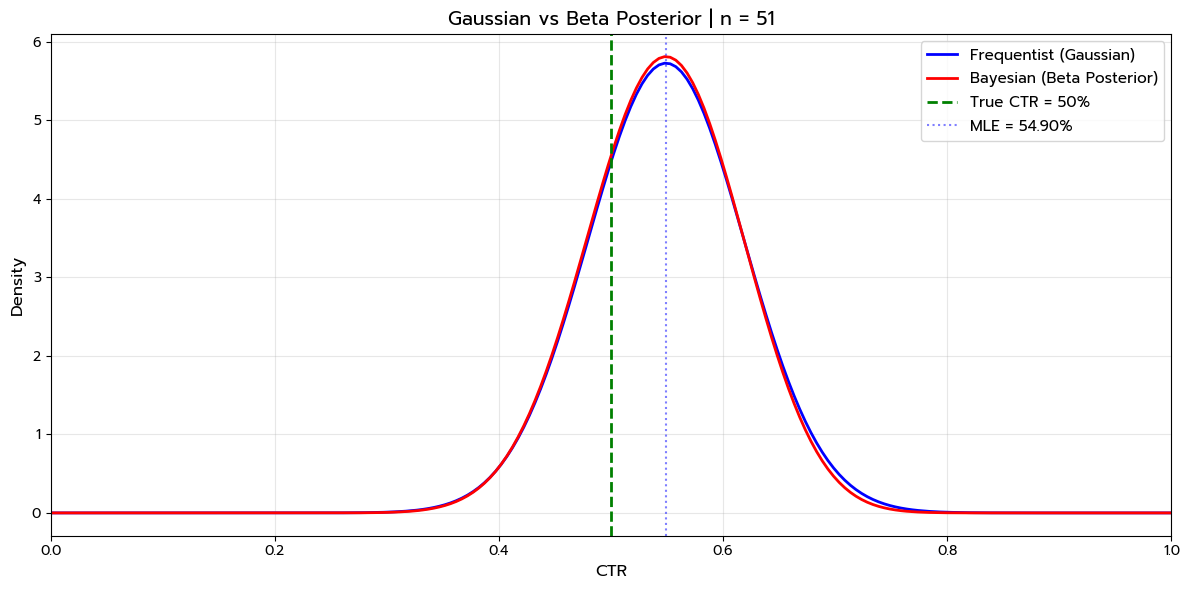


📊 n = 51:
   Frequentist (Gaussian):
     - p̂ (MLE) = 0.5490
     - SE = 0.0697
     - 95% CI = [0.4125, 0.6856]

   Bayesian (Beta):
     - Mean = 0.5472
     - Std = 0.0677
     - Beta(29, 24)




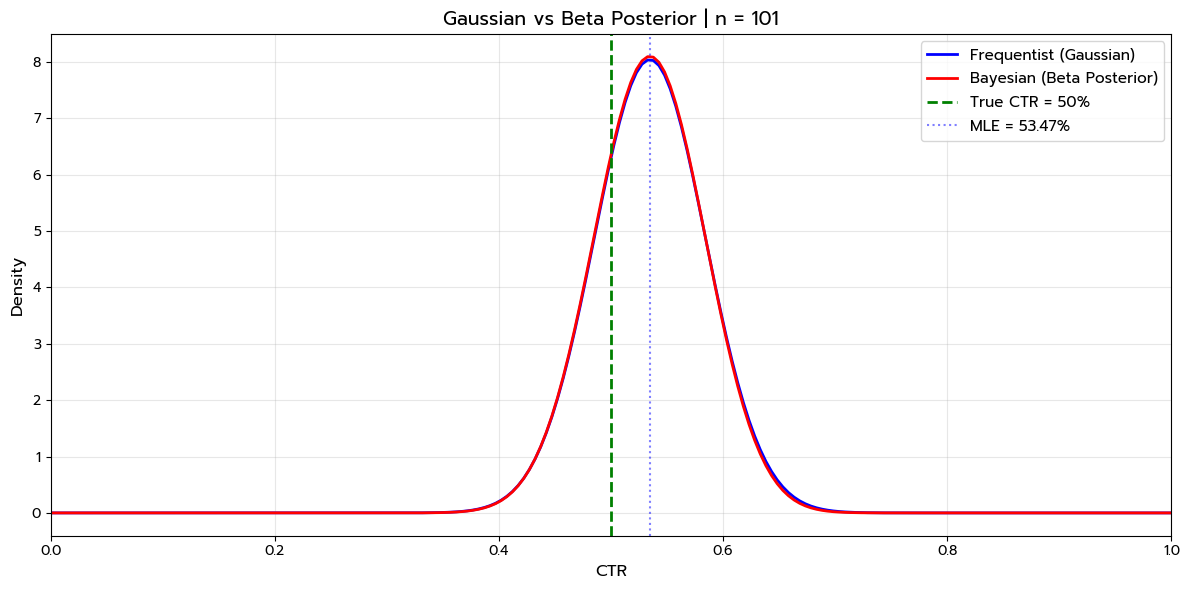


📊 n = 101:
   Frequentist (Gaussian):
     - p̂ (MLE) = 0.5347
     - SE = 0.0496
     - 95% CI = [0.4374, 0.6319]

   Bayesian (Beta):
     - Mean = 0.5340
     - Std = 0.0489
     - Beta(55, 48)




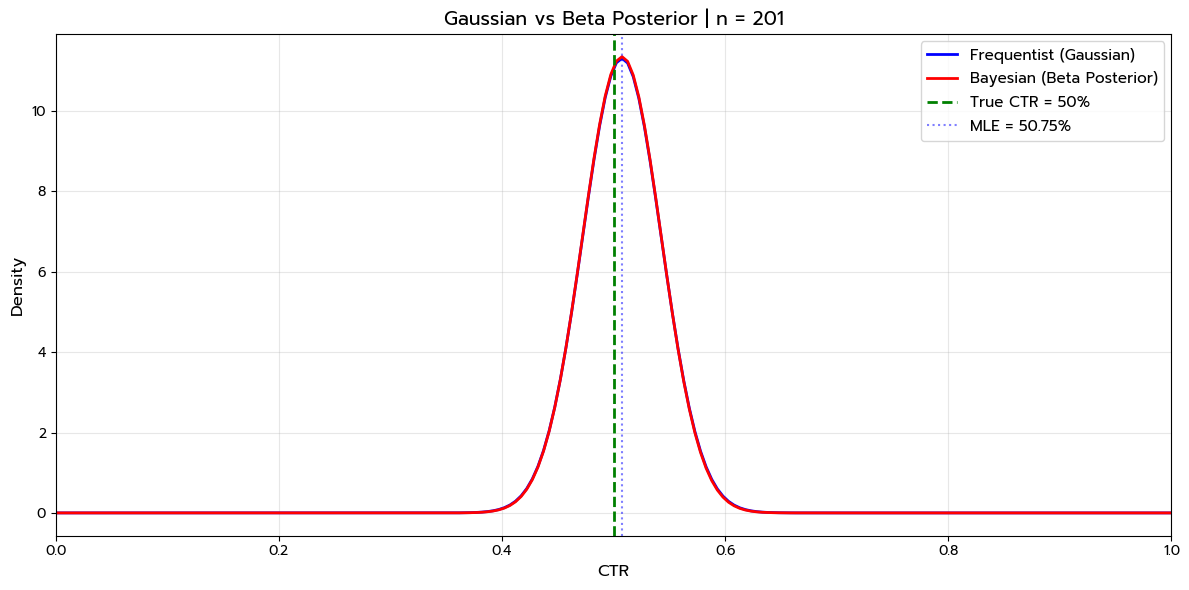


📊 n = 201:
   Frequentist (Gaussian):
     - p̂ (MLE) = 0.5075
     - SE = 0.0353
     - 95% CI = [0.4383, 0.5766]

   Bayesian (Beta):
     - Mean = 0.5074
     - Std = 0.0350
     - Beta(103, 100)




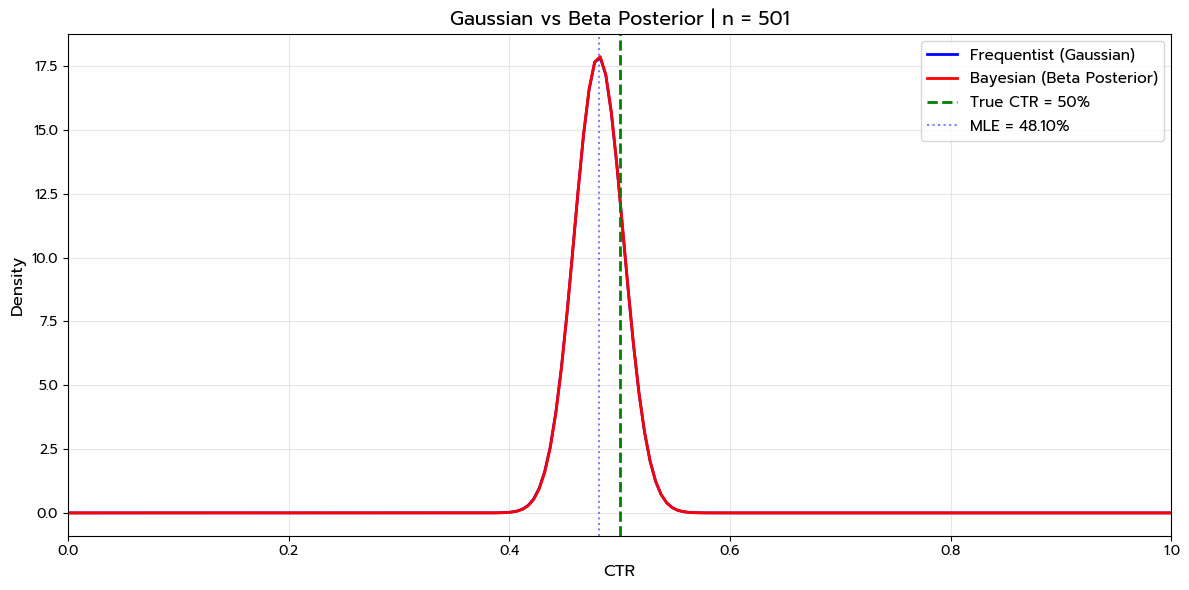


📊 n = 501:
   Frequentist (Gaussian):
     - p̂ (MLE) = 0.4810
     - SE = 0.0223
     - 95% CI = [0.4373, 0.5248]

   Bayesian (Beta):
     - Mean = 0.4811
     - Std = 0.0223
     - Beta(242, 261)


✅ เสร็จสิ้นการเปรียบเทียบทั้งหมด!


In [6]:
# รีเซ็ตค่า a, b และทอยใหม่
np.random.seed(42)  # ใช้ seed เพื่อให้ผลเหมือนเดิม

a_curr, b_curr = 1, 1
data_new = np.empty(T)

print("🔍 เริ่มการเปรียบเทียบ...\n")
print("="*60)

for i in range(T):
    # สุ่มผลลัพธ์
    x = 1 if np.random.random() < true_ctr else 0
    data_new[i] = x
    
    # อัพเดท a, b
    a_curr += x
    b_curr += (1 - x)
    
    # แสดงกราฟในจุดที่กำหนด
    if i in plot_indices:
        n = i + 1
        compare_distributions(data_new, n, a_curr, b_curr, true_ctr)

print("✅ เสร็จสิ้นการเปรียบเทียบทั้งหมด!")

## 📈 Step 6: ดูพัฒนาการของ Confidence

มาดูว่าความมั่นใจ (ความแคบของ distribution) เปลี่ยนไปอย่างไร

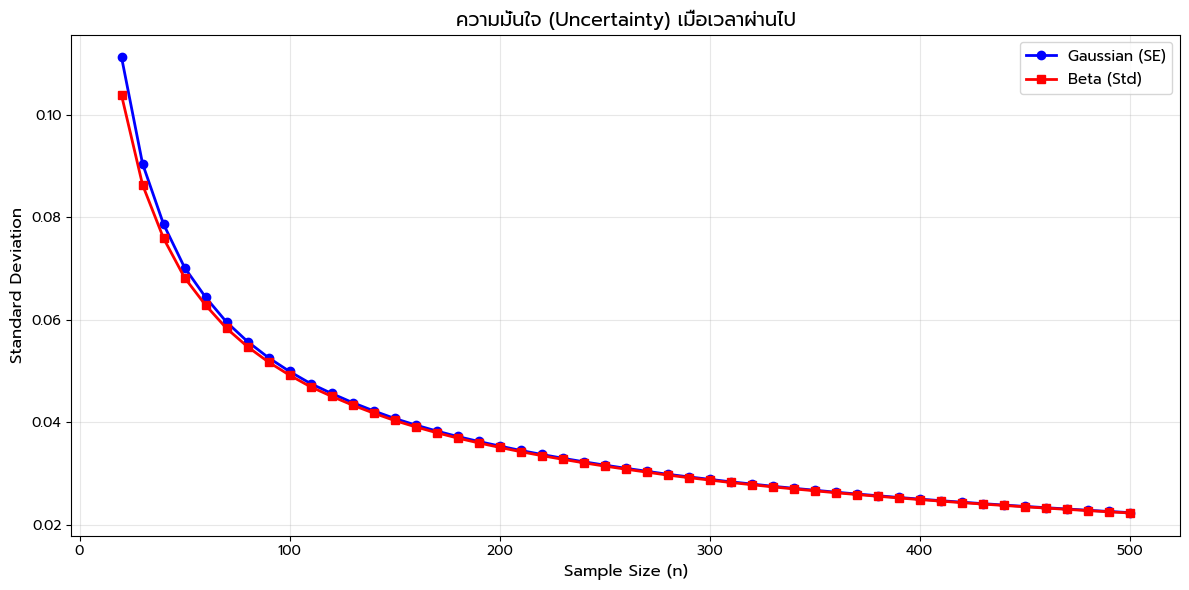

💡 สังเกต:
  - ทั้งสองเส้นลดลงเมื่อ n เพิ่มขึ้น (มั่นใจมากขึ้น)
  - เมื่อ n มาก → ทั้งสองเส้นใกล้เคียงกัน
  - Beta ให้ค่าที่ smoother และ stable กว่า


In [7]:
# คำนวณ standard deviation ในแต่ละจุด
sample_sizes = []
gaussian_stds = []
beta_stds = []

a_temp, b_temp = 1, 1

for i in range(T):
    x = data_new[i]
    a_temp += x
    b_temp += (1 - x)
    
    if i >= 10 and (i + 1) % 10 == 0:  # ทุก ๆ 10 ตัวอย่าง
        n = i + 1
        p_hat = data_new[:n].mean()
        
        # Gaussian std
        gaussian_std = np.sqrt(p_hat * (1 - p_hat) / n)
        
        # Beta std
        beta_std = np.sqrt(a_temp * b_temp / ((a_temp + b_temp)**2 * (a_temp + b_temp + 1)))
        
        sample_sizes.append(n)
        gaussian_stds.append(gaussian_std)
        beta_stds.append(beta_std)

# วาดกราฟ
plt.figure(figsize=(12, 6))

plt.plot(sample_sizes, gaussian_stds, 'b-', linewidth=2, marker='o', label='Gaussian (SE)')
plt.plot(sample_sizes, beta_stds, 'r-', linewidth=2, marker='s', label='Beta (Std)')

plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.title('ความมั่นใจ (Uncertainty) เมื่อเวลาผ่านไป', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 สังเกต:")
print("  - ทั้งสองเส้นลดลงเมื่อ n เพิ่มขึ้น (มั่นใจมากขึ้น)")
print("  - เมื่อ n มาก → ทั้งสองเส้นใกล้เคียงกัน")
print("  - Beta ให้ค่าที่ smoother และ stable กว่า")

## 🎓 สรุป: สิ่งที่เราได้เรียนรู้

### 🔑 แนวคิดหลัก (Key Concepts):

#### 1. **Frequentist Approach (Gaussian Approximation)**

**สูตร**:
- p̂ = จำนวน success / n
- SE = √[p̂(1-p̂) / n]
- 95% CI = p̂ ± 1.96 × SE

**ข้อดี**:
- ✅ คำนวณง่าย
- ✅ ใช้ได้กับ n ใหญ่
- ✅ ไม่ต้องกำหนด prior

**ข้อเสีย**:
- ❌ ต้องมี n ≥ 30 (CLT)
- ❌ ไม่แม่นเมื่อ p̂ ใกล้ 0 หรือ 1
- ❌ CI ไม่ใช่ probability distribution

```python
# Frequentist
p_hat = data.mean()
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci_lower = p_hat - 1.96 * se
ci_upper = p_hat + 1.96 * se
```

#### 2. **Bayesian Approach (Beta Posterior)**

**สูตร**:
- Prior: Beta(a₀, b₀)
- Data: x successes, n-x failures
- Posterior: Beta(a₀ + x, b₀ + n - x)

**ข้อดี**:
- ✅ ทำงานได้แม้ n น้อย
- ✅ Full probability distribution
- ✅ อัพเดทได้ sequential
- ✅ Incorporate prior knowledge

**ข้อเสีย**:
- ❌ ต้องเลือก prior (แต่ไม่สำคัญเมื่อ n มาก)
- ❌ ซับซ้อนกว่าเล็กน้อย

```python
# Bayesian
a = 1  # prior
b = 1  # prior
for x in data:
    a += x
    b += (1 - x)
# Posterior: Beta(a, b)
```

#### 3. **เมื่อไหร่ใช้อะไร?**

| สถานการณ์ | แนะนำ | เหตุผล |
|-----------|-------|--------|
| n < 30 | **Bayesian** | Gaussian ไม่แม่น |
| n ≥ 30 | **ทั้งสอง** | ผลเหมือนกัน |
| p ใกล้ 0 หรือ 1 | **Bayesian** | Gaussian asymmetric |
| Sequential testing | **Bayesian** | อัพเดทง่ายกว่า |
| Simple report | **Frequentist** | เข้าใจง่าย |
| Need full posterior | **Bayesian** | มีข้อมูลเต็ม |

#### 4. **ความหมายที่ต่างกัน**

**Frequentist 95% CI**:
> "ถ้าทำซ้ำ 100 ครั้ง, 95 ครั้ง interval จะครอบค่าจริง"
> - ❌ ไม่ใช่: "มีโอกาส 95% ที่ค่าจริงอยู่ใน interval"

**Bayesian 95% Credible Interval**:
> "มีความน่าจะเป็น 95% ที่ค่าจริงอยู่ใน interval"
> - ✅ ใช่! นี่คือสิ่งที่เราต้องการจริง ๆ

#### 5. **สิ่งที่เห็นจากกราฟ**

**เมื่อ n น้อย (n = 10-30)**:
- Gaussian กว้างและ skewed
- Beta smoother และสมมาตรกว่า
- Beta ให้ประมาณที่ดีกว่า

**เมื่อ n ปานกลาง (n = 50-100)**:
- Gaussian เริ่มดีขึ้น
- Beta ยังดีกว่าเล็กน้อย
- ความแตกต่างลดลง

**เมื่อ n มาก (n = 200+)**:
- Gaussian และ Beta เหมือนกันมาก
- ทั้งสองแคบลง (มั่นใจมากขึ้น)
- เลือกอะไรก็ได้

### 📊 ตารางเปรียบเทียบ:

| Aspect | Frequentist | Bayesian |
|--------|-------------|----------|
| **Philosophy** | Long-run frequency | Degree of belief |
| **Output** | Point estimate + CI | Full posterior |
| **Prior** | ไม่ใช้ | ใช้ |
| **Interpretation** | Coverage probability | Credibility |
| **Sequential** | ทำได้แต่ยาก | ง่ายมาก |
| **Small n** | ไม่แม่น | แม่น |
| **Large n** | แม่น | แม่น (เหมือนกัน) |
| **Computation** | ง่าย | ซับซ้อนหน่อย |

### 🌍 ประยุกต์ใช้:

1. **A/B Testing**:
   - Frequentist: Report CTR + 95% CI
   - Bayesian: P(B > A) = ?

2. **Clinical Trials**:
   - Frequentist: Fixed sample size
   - Bayesian: Adaptive designs

3. **Quality Control**:
   - Frequentist: Control charts
   - Bayesian: Predictive monitoring

4. **Marketing**:
   - Frequentist: Conversion rate ± SE
   - Bayesian: Posterior distribution

### 💡 Key Takeaways:

1. **เมื่อข้อมูลน้อย** → ใช้ Bayesian
2. **เมื่อข้อมูลเยอะ** → ใช้อะไรก็ได้ (เหมือนกัน)
3. **Bayesian ให้ข้อมูลมากกว่า** (full posterior)
4. **Frequentist เข้าใจง่ายกว่า** (สำหรับคนทั่วไป)
5. **ไม่มีอันไหนดีกว่า** → ขึ้นกับสถานการณ์

---

## 🎉 ยินดีด้วย!

คุณเข้าใจ **ความแตกต่างระหว่าง Frequentist และ Bayesian** แล้ว!  
นี่คือรากฐานสำคัญของ Statistical Inference! 💪

**Next Steps**:
- เรียนรู้ **Credible Intervals** (Bayesian CI)
- ศึกษา **Hypothesis Testing** (ทั้ง 2 แนวทาง)
- ทดลอง **Different Priors** (Informative vs Uninformative)
- ประยุกต์กับ **Real A/B Testing**

---